In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
import lightgbm as lgb
from sklearn import model_selection
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, plot_confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor



In [8]:
train = pd.read_csv(r"C:\Users\Airin\Desktop\Xccelerate\0.00 ASSIGNMENTS\ML Project - Predicting Airline Passenger's Satisfaction\Data\train.csv")

In [9]:
test = pd.read_csv(r"C:\Users\Airin\Desktop\Xccelerate\0.00 ASSIGNMENTS\ML Project - Predicting Airline Passenger's Satisfaction\Data\test.csv")

In [10]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [11]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [12]:
train.columns = train.columns.str.replace(' ', '_')

In [13]:
test.columns = test.columns.str.replace(' ', '_')

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed:_0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer_Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type_of_Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight_Distance                    103904 non-null  int64  
 8   Inflight_wifi_service              103904 non-null  int64  
 9   Departure/Arrival_time_convenient  103904 non-null  int64  
 10  Ease_of_Online_booking             103904 non-null  int64  
 11  Gate_location                      1039

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed:_0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer_Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type_of_Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight_Distance                    25976 non-null  int64  
 8   Inflight_wifi_service              25976 non-null  int64  
 9   Departure/Arrival_time_convenient  25976 non-null  int64  
 10  Ease_of_Online_booking             25976 non-null  int64  
 11  Gate_location                      25976 non-null  int

In [16]:
train.describe()

,Unnamed:_0,id,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [17]:
test.describe()

,Unnamed:_0,id,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


# Cleaning The Dataset

### Dropping unnecessary columns

In [18]:
train = train.drop(['Unnamed:_0', 'id'], axis = 1)

In [19]:
test = test.drop(['Unnamed:_0', 'id'], axis = 1)

### Checking for data imbalance

In [20]:
train['satisfaction'].value_counts(normalize = True) * 100

neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: satisfaction, dtype: float64

In [21]:
test['satisfaction'].value_counts(normalize = True) * 100

neutral or dissatisfied    56.101786
satisfied                  43.898214
Name: satisfaction, dtype: float64

In [22]:
# Data is pretty balanced - no need to do any resampling.

### Checking for null values

In [23]:
train.isnull().sum()

Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310
satisfaction                           0
dtype: int64

In [24]:
test.isnull().sum()

Gender                                0
Customer_Type                         0
Age                                   0
Type_of_Travel                        0
Class                                 0
Flight_Distance                       0
Inflight_wifi_service                 0
Departure/Arrival_time_convenient     0
Ease_of_Online_booking                0
Gate_location                         0
Food_and_drink                        0
Online_boarding                       0
Seat_comfort                          0
Inflight_entertainment                0
On-board_service                      0
Leg_room_service                      0
Baggage_handling                      0
Checkin_service                       0
Inflight_service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             83
satisfaction                          0
dtype: int64

### Filling the null values in with median of arrival delay in minutes

In [25]:
train['Arrival_Delay_in_Minutes'].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival_Delay_in_Minutes, dtype: float64

In [26]:
test['Arrival_Delay_in_Minutes'].describe()

count    25893.000000
mean        14.740857
std         37.517539
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max       1115.000000
Name: Arrival_Delay_in_Minutes, dtype: float64

In [27]:
train['Arrival_Delay_in_Minutes'].median()

0.0

In [28]:
test['Arrival_Delay_in_Minutes'].median()

0.0

In [29]:
train['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(0)

In [30]:
test['Arrival_Delay_in_Minutes'] = test['Arrival_Delay_in_Minutes'].fillna(0)

In [31]:
train['Arrival_Delay_in_Minutes'].isnull().sum()

0

In [32]:
test['Arrival_Delay_in_Minutes'].isnull().sum()

0

# Understanding Data Through EDA

In [33]:
plt.style.use('seaborn-pastel') 

In [34]:
def bar_plot(variable):
    # we get the features
    var = train[variable]
    # count number of categorical variable
    varValue = var.value_counts()
    
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
     

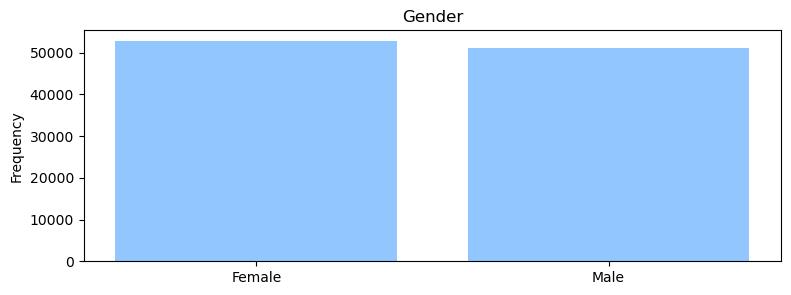

Gender: 
 Female    52727
Male      51177
Name: Gender, dtype: int64


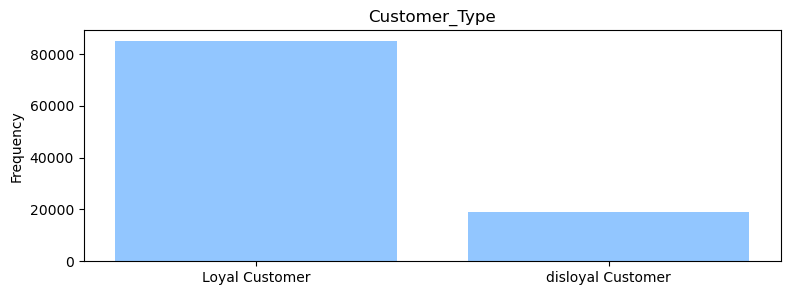

Customer_Type: 
 Loyal Customer       84923
disloyal Customer    18981
Name: Customer_Type, dtype: int64


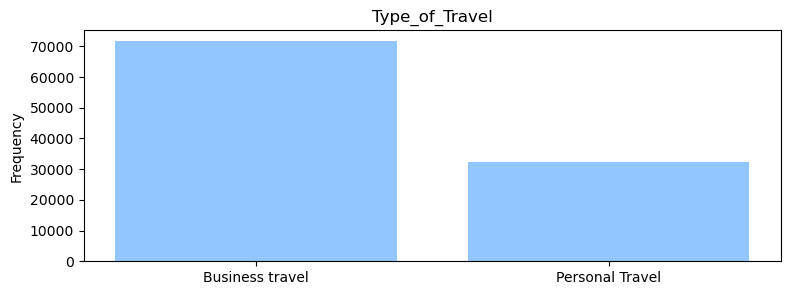

Type_of_Travel: 
 Business travel    71655
Personal Travel    32249
Name: Type_of_Travel, dtype: int64


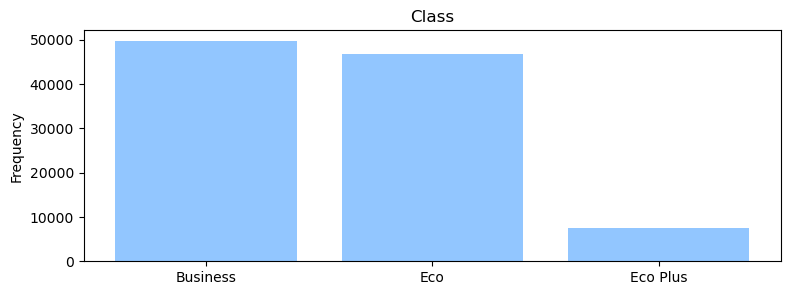

Class: 
 Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64


In [35]:
categorical_var = ["Gender", "Customer_Type", "Type_of_Travel", "Class"]
for each in categorical_var:
    bar_plot(each)

In [36]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

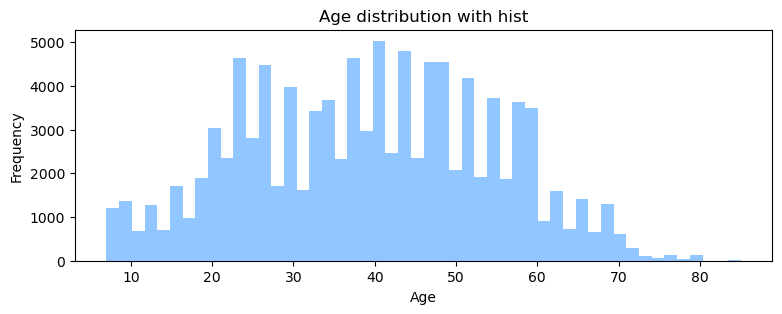

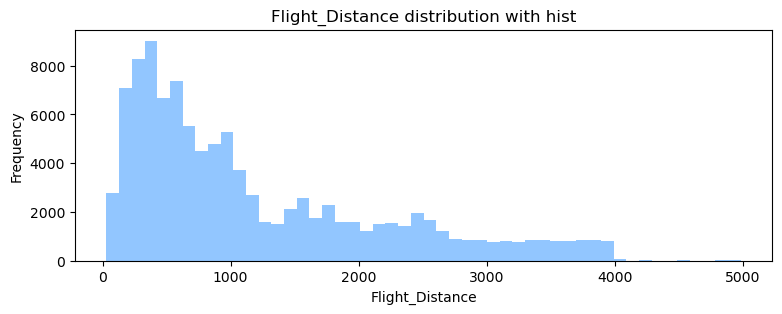

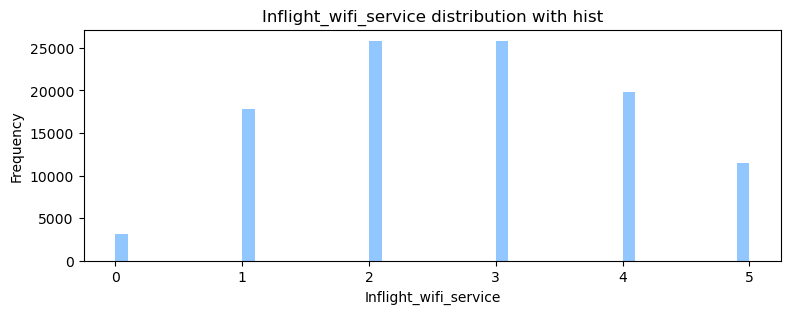

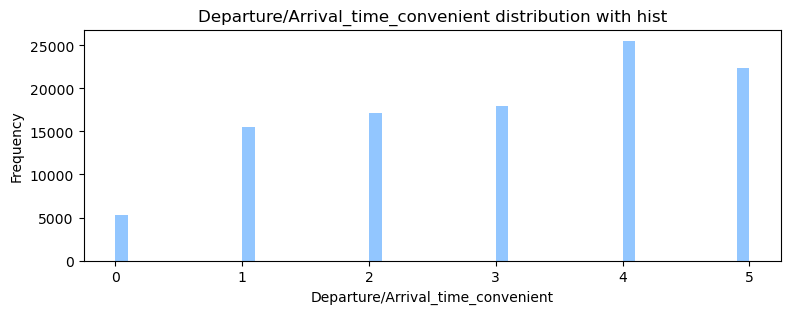

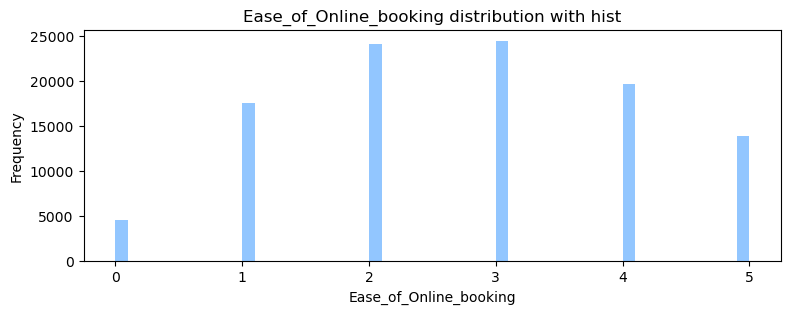

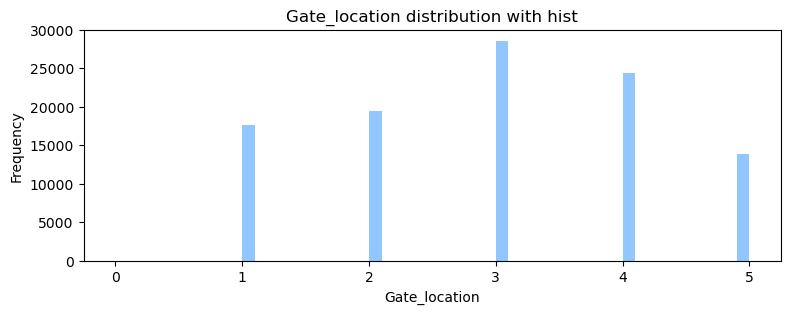

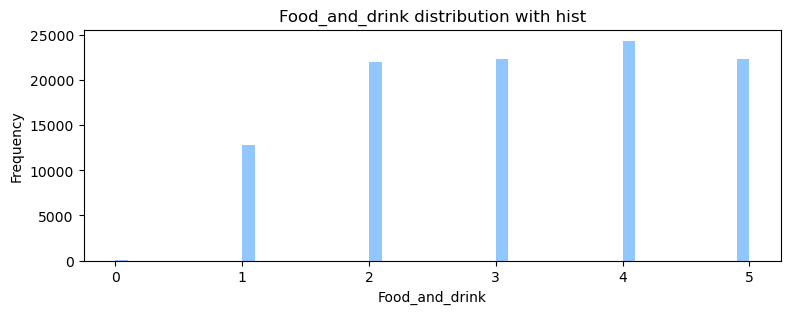

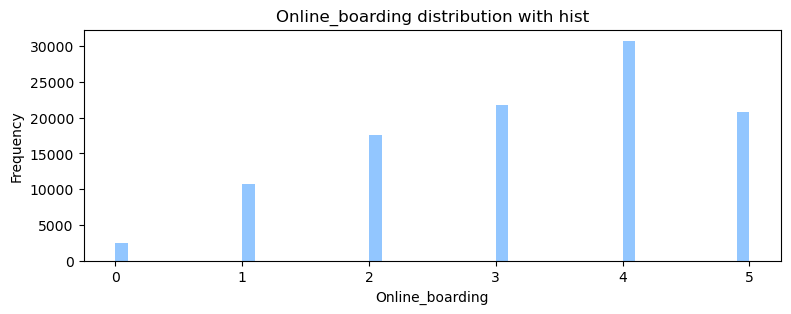

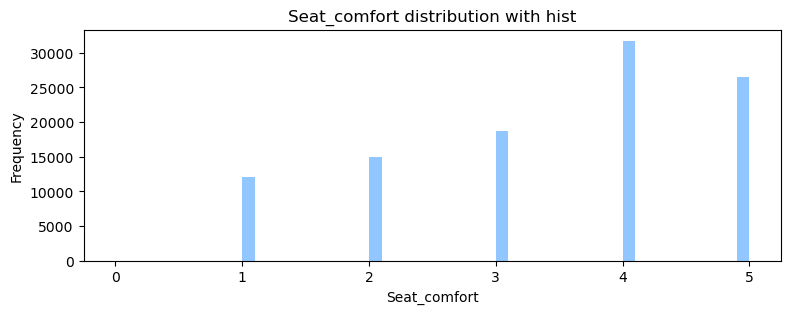

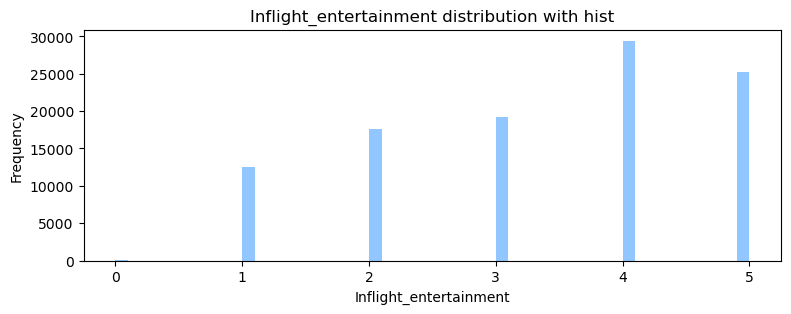

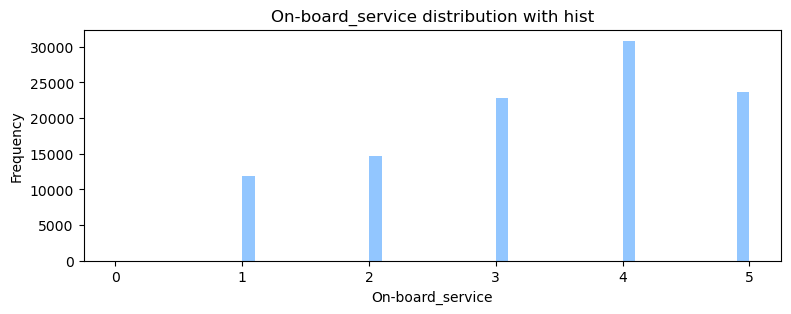

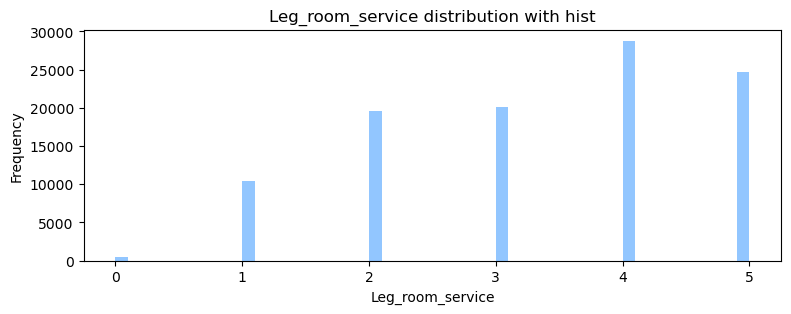

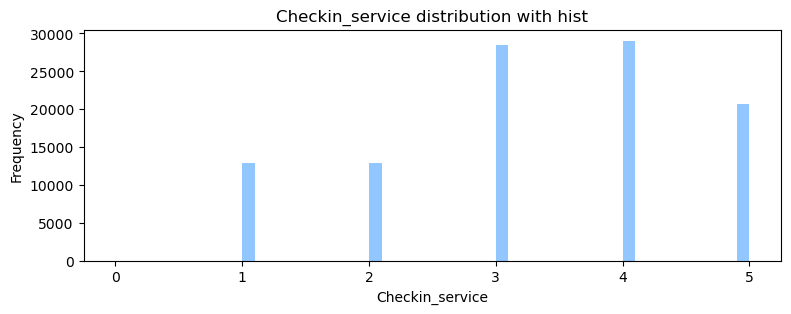

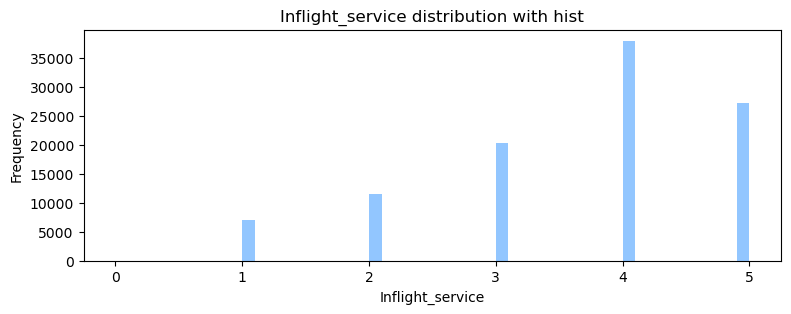

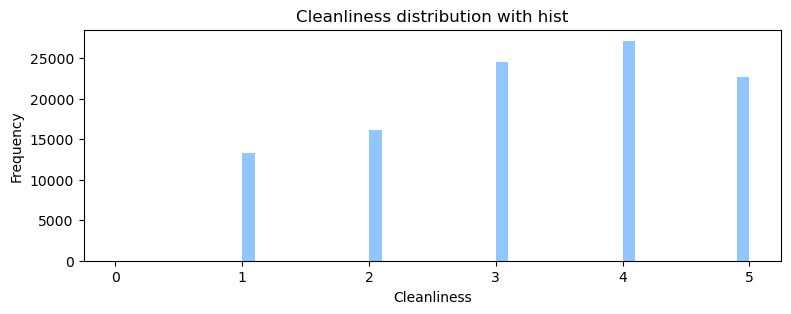

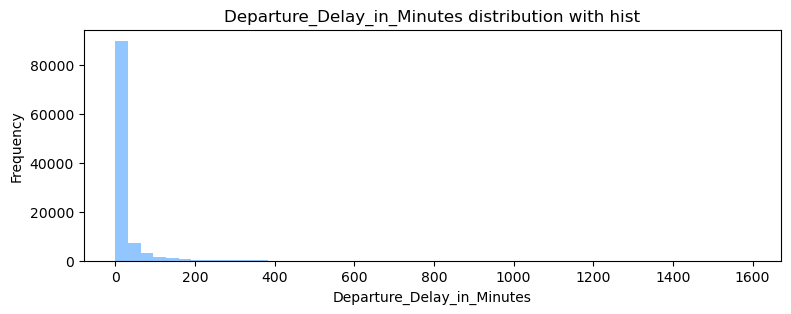

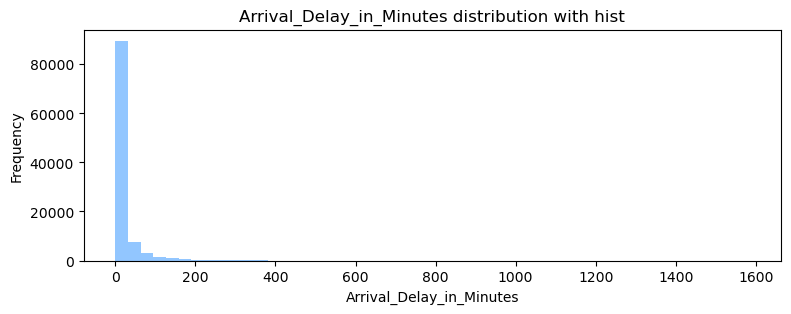

In [37]:
numerical_var = ["Age", "Flight_Distance", "Inflight_wifi_service", "Departure/Arrival_time_convenient", "Ease_of_Online_booking", "Gate_location", "Food_and_drink", "Online_boarding", "Seat_comfort", "Inflight_entertainment", "On-board_service", "Leg_room_service", "Checkin_service", "Inflight_service", "Cleanliness", "Departure_Delay_in_Minutes", "Arrival_Delay_in_Minutes"]
for n in numerical_var:
    plot_hist(n)

### Encoding Categorical Data

In [38]:
train['Customer_Type'].unique()
# Ordinal encoding

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [39]:
train['Class'].unique() 
# Ordinal encoding

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [40]:
train['satisfaction'].unique() 
# Ordinal encoding

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [41]:
train.Gender.unique()
# One hot encoding

array(['Male', 'Female'], dtype=object)

In [42]:
train['Type_of_Travel'].unique() 
# One hot encoding

array(['Personal Travel', 'Business travel'], dtype=object)

### Ordinal Encoding

In [43]:
encoder_cust_loyalty = OrdinalEncoder(categories = [["disloyal Customer", "Loyal Customer"]])
train["Customer_Type"] = encoder_cust_loyalty.fit_transform(train[["Customer_Type"]])
test["Customer_Type"] = encoder_cust_loyalty.fit_transform(test[["Customer_Type"]])

In [44]:
encoder_class = OrdinalEncoder(categories = [["Eco", "Eco Plus", "Business"]])
train["Class"] = encoder_class.fit_transform(train[['Class']])
test["Class"] = encoder_class.fit_transform(test[['Class']])

In [45]:
encoder_satisfaction = OrdinalEncoder(categories = [["neutral or dissatisfied", "satisfied"]])
train["satisfaction"] = encoder_satisfaction.fit_transform(train[['satisfaction']])
test["satisfaction"] = encoder_satisfaction.fit_transform(test[['satisfaction']])

### One Hot Encoding

In [46]:
gender_dummies_train = pd.get_dummies(train['Gender'], prefix = 'Gender', columns = ['Gender'], drop_first = True)
type_of_travel_dummies_train = pd.get_dummies(train['Type_of_Travel'], prefix = 'Type_of_Travel', columns = ['Type_of_Travel'], drop_first = True)
train = pd.concat([train, gender_dummies_train, type_of_travel_dummies_train], axis=1)

In [47]:
train = train.drop(['Gender', 'Type_of_Travel'], axis = 1)

In [48]:
gender_dummies_test = pd.get_dummies(test['Gender'], prefix = 'Gender', columns = ['Gender'], drop_first = True)
type_of_travel_dummies_test = pd.get_dummies(test['Type_of_Travel'], prefix = 'Type_of_Travel', columns = ['Type_of_Travel'], drop_first = True)
test = pd.concat([test, gender_dummies_test, type_of_travel_dummies_test], axis=1)

In [49]:
test = test.drop(['Gender', 'Type_of_Travel'], axis = 1)

In [50]:
# Reordering the dataframe columns

col_at_end = ['satisfaction']
train = train[[c for c in train if c not in col_at_end] + [c for c in col_at_end if c in train]]
test = test[[c for c in test if c not in col_at_end] + [c for c in col_at_end if c in test]]

In [54]:
train.shape

(103904, 23)

In [52]:
test

,Customer_Type,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,...,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender_Male,Type_of_Travel_Personal Travel,satisfaction
0,1.0,52,0.0,160,5,4,3,4,3,4,...,5,5,2,5,5,50,44.0,0,0,1.0
1,1.0,36,2.0,2863,1,1,3,1,5,4,...,4,4,3,4,5,0,0.0,0,0,1.0
2,0.0,20,0.0,192,2,0,2,4,2,2,...,1,3,2,2,2,0,0.0,1,0,0.0
3,1.0,44,2.0,3377,0,0,0,2,3,4,...,1,1,3,1,4,0,6.0,1,0,1.0
4,1.0,49,0.0,1182,2,3,4,3,4,1,...,2,2,4,2,4,0,20.0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0.0,34,2.0,526,3,3,3,1,4,3,...,2,4,4,5,4,0,0.0,1,0,0.0
25972,1.0,23,2.0,646,4,4,4,4,4,4,...,5,5,5,5,4,0,0.0,1,0,1.0
25973,1.0,17,0.0,828,2,5,1,5,2,1,...,3,4,5,4,2,0,0.0,0,1,0.0
25974,1.0,14,2.0,1127,3,3,3,3,4,4,...,2,5,4,5,4,0,0.0,1,0,1.0


In [342]:
train

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,1.0,13,Personal Travel,1.0,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0.0
1,Male,0.0,25,Business travel,2.0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0.0
2,Female,1.0,26,Business travel,2.0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1.0
3,Female,1.0,25,Business travel,2.0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0.0
4,Male,1.0,61,Business travel,2.0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,0.0,23,Business travel,0.0,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0.0
103900,Male,1.0,49,Business travel,2.0,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1.0
103901,Male,0.0,30,Business travel,2.0,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0.0
103902,Female,0.0,22,Business travel,0.0,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0.0


   Gender  satisfaction
1    Male      0.439475
0  Female      0.427371


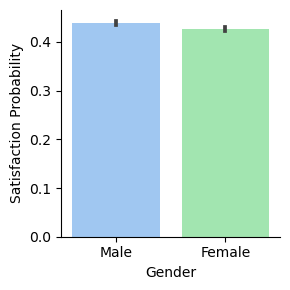

In [347]:
print(train[["Gender","satisfaction"]].groupby(["Gender"], as_index = False).mean().sort_values(by="satisfaction",ascending = False))
g = sns.catplot(x = "Gender", y = "satisfaction", data = train, kind = "bar", height = 3)
g.set_ylabels("Satisfaction Probability")
plt.show()

   Class  satisfaction
2    2.0      0.694251
1    1.0      0.246064
0    0.0      0.186138


C:\Users\Airin\anaconda3\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


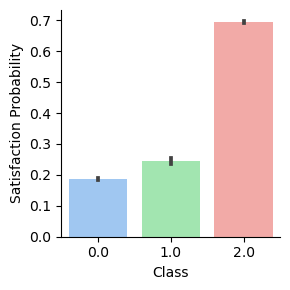

In [348]:
print(train[["Class","satisfaction"]].groupby(["Class"], as_index = False).mean().sort_values(by="satisfaction",ascending = False))

g = sns.catplot(x = "Class", y = "satisfaction", data = train, kind = "bar", size = 3)
g.set_ylabels("Satisfaction Probability")
plt.show()

   Customer_Type  satisfaction
1            1.0      0.477291
0            0.0      0.236658


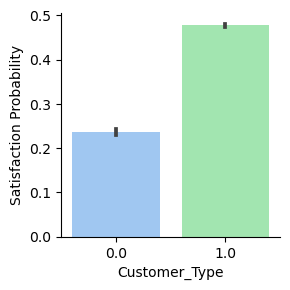

In [351]:
print(train[["Customer_Type","satisfaction"]].groupby(["Customer_Type"], as_index = False).mean().sort_values(by="satisfaction",ascending = False))


g = sns.catplot(x = "Customer_Type", y = "satisfaction", data = train, kind = "bar", height = 3)
g.set_ylabels("Satisfaction Probability")
plt.show()

    Type_of_Travel  satisfaction
0  Business travel      0.582597
1  Personal Travel      0.101678


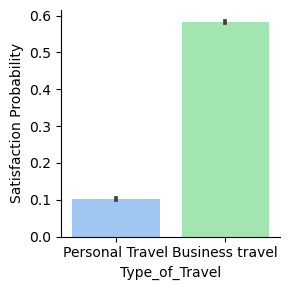

In [352]:
print(train[["Type_of_Travel","satisfaction"]].groupby(["Type_of_Travel"], as_index = False).mean().sort_values(by="satisfaction",ascending = False))


g = sns.catplot(x = "Type_of_Travel", y = "satisfaction", data = train, kind = "bar", height = 3)
g.set_ylabels("Satisfaction Probability")
plt.show()

### Feature Scaling

In [46]:
X_train = train.iloc[:,:-1].values
y_train = train.iloc[:,-1].values

In [47]:
X_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values

In [48]:
# Split into test and train

# y_train = train.pop('satisfaction').values
# X_train = train.values
# y_test = test.pop('satisfaction').values
# X_test = test.values

In [49]:
# Normalize Features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

C:\Users\Airin\AppData\Local\Temp\ipykernel_4680\2911005644.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

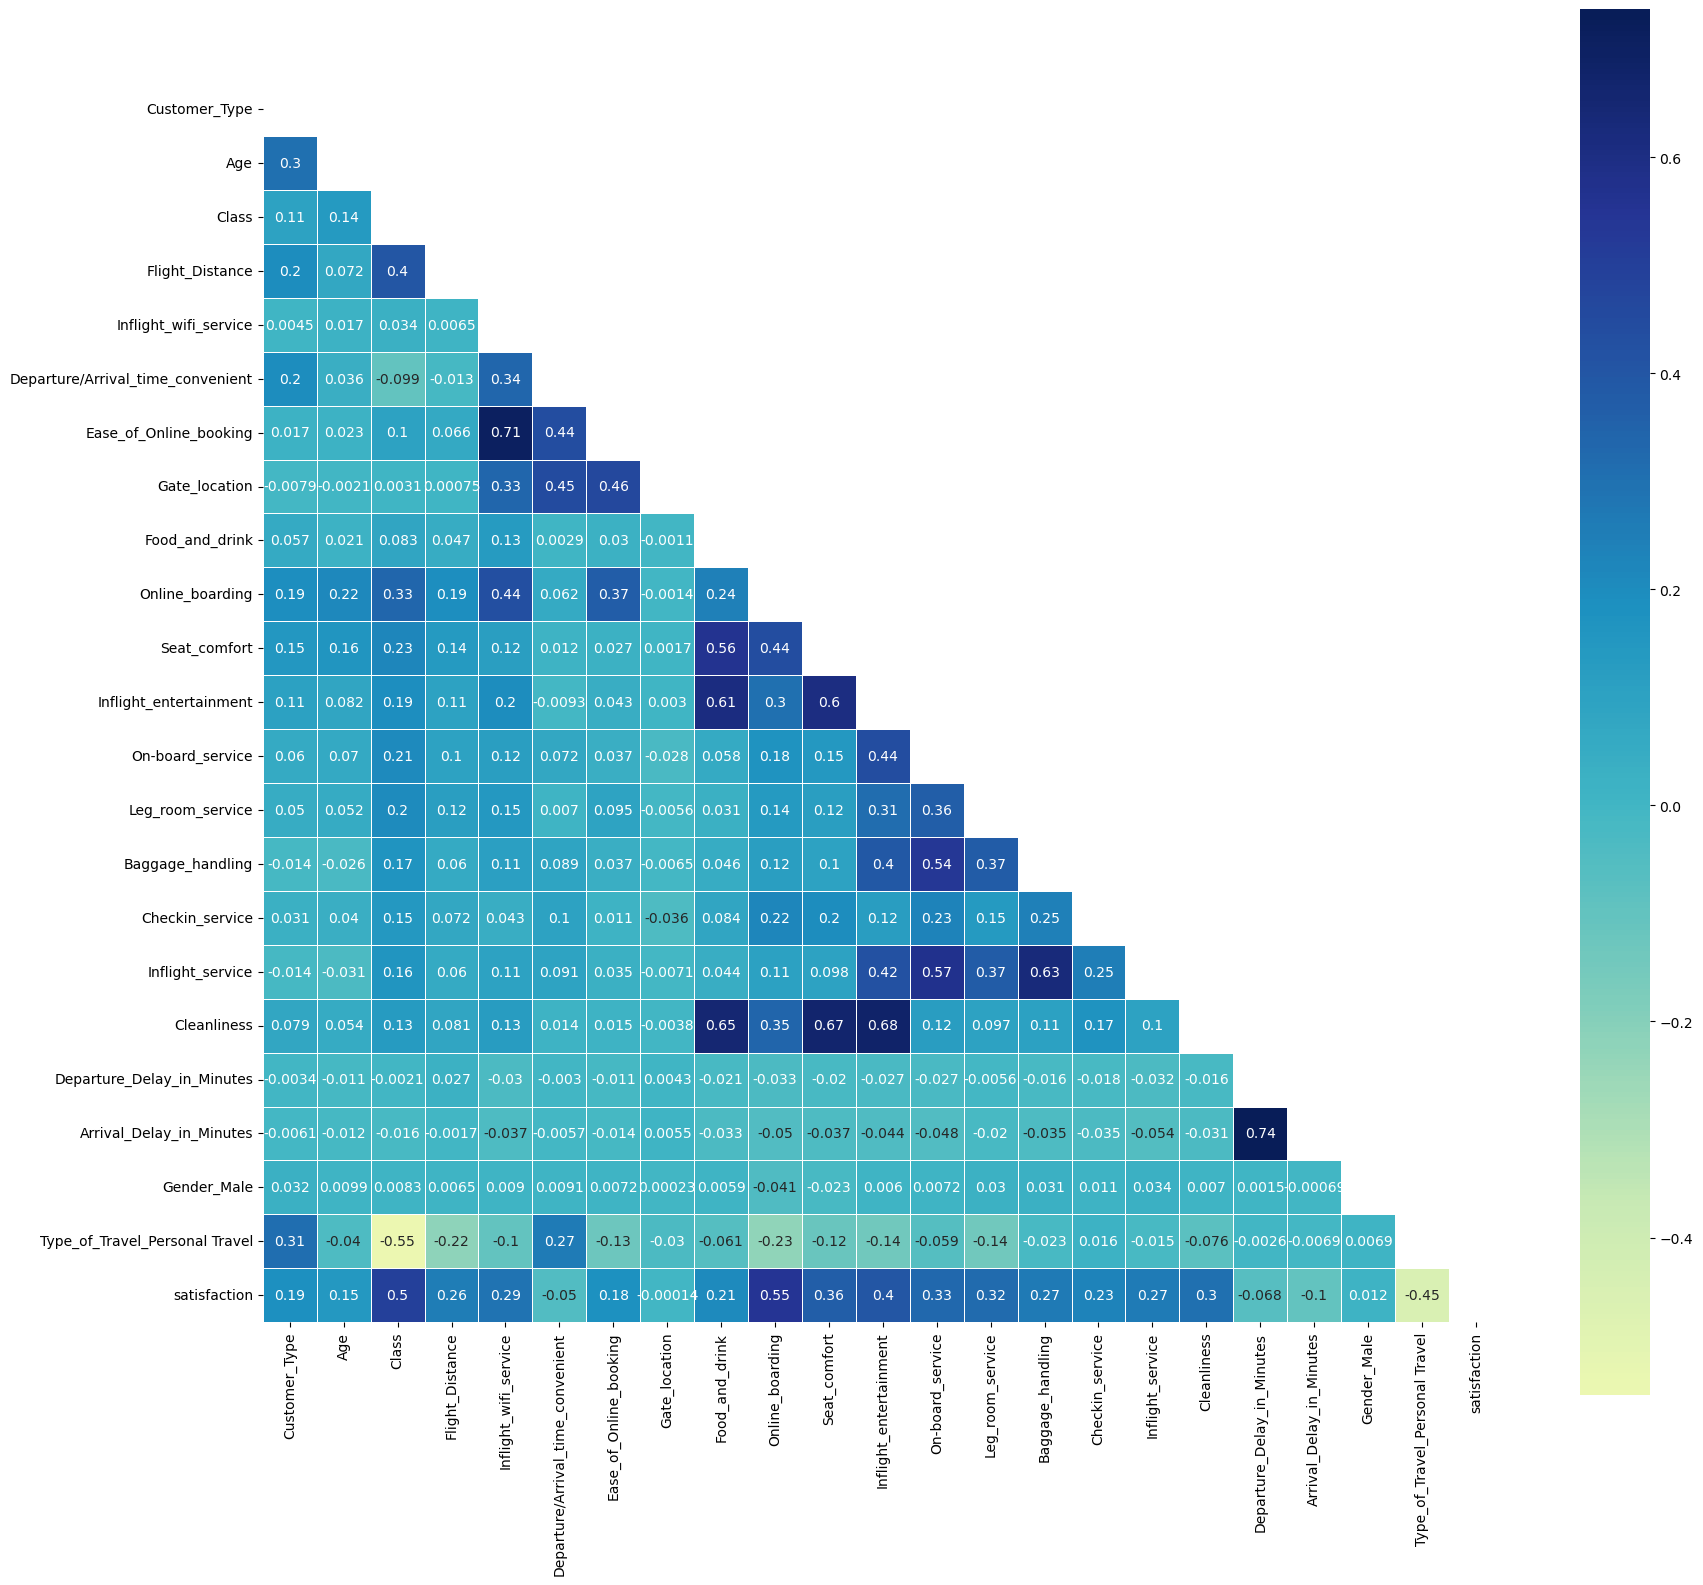

In [50]:
corr = train.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)

# Model Evaluation

### KNN

In [51]:
#Initiating the classifier
model_knn = KNeighborsClassifier()
#Passing the data to the classifier
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
y_pred_knn = model_knn.predict(X_test)

C:\Users\Airin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [54]:
result_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy is: ', result_knn*100)

Accuracy is:  92.88959039113027


In [55]:
print(confusion_matrix(y_test, y_pred_knn))

[[14044   529]
 [ 1318 10085]]


C:\Users\Airin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


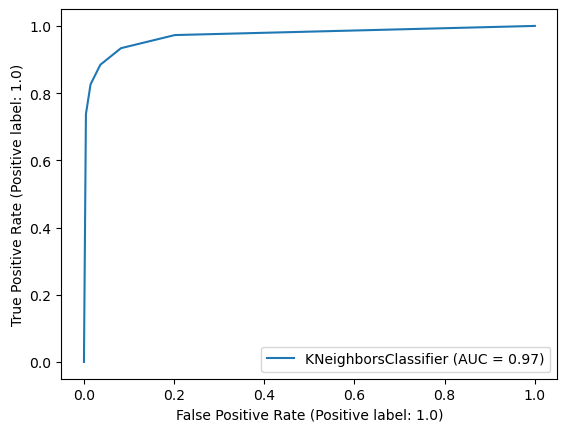

In [56]:
metrics.plot_roc_curve(model_knn, X_test, y_test)  
plt.show() 

### Decision Trees

In [57]:
model_dt = DecisionTreeClassifier(criterion='entropy')
#Passing the data to the classifier
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [58]:
y_pred_dt = model_dt.predict(X_test)

In [59]:
result_dt = accuracy_score(y_test, y_pred_dt)
print('Accuracy is: ', result_dt*100)

Accuracy is:  94.92608561749307


In [60]:
print(confusion_matrix(y_test, y_pred_dt))

[[13898   675]
 [  643 10760]]


C:\Users\Airin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


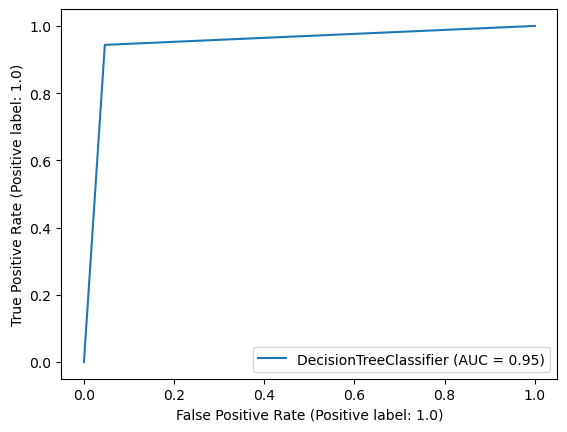

In [61]:
metrics.plot_roc_curve(model_dt, X_test, y_test)  
plt.show() 

### Random Forest

In [353]:
#Initiating the classifier
model_rf = RandomForestClassifier(n_estimators=1000)
#Passing the data to the classifier
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [354]:
y_pred_rf = model_rf.predict(X_test)

In [355]:
#Classification Metrics - To check the final results
result_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy is: ', result_rf*100)

Accuracy is:  96.377425315676


[[14280   293]
 [  648 10755]]


C:\Users\Airin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


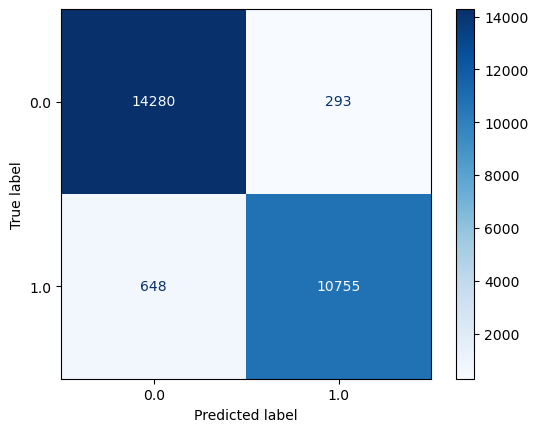

In [376]:
print(confusion_matrix(y_test, y_pred_rf))

plot_confusion_matrix(model_rf, X_test, y_test,cmap=plt.cm.Blues)

In [66]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     14573
         1.0       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



C:\Users\Airin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


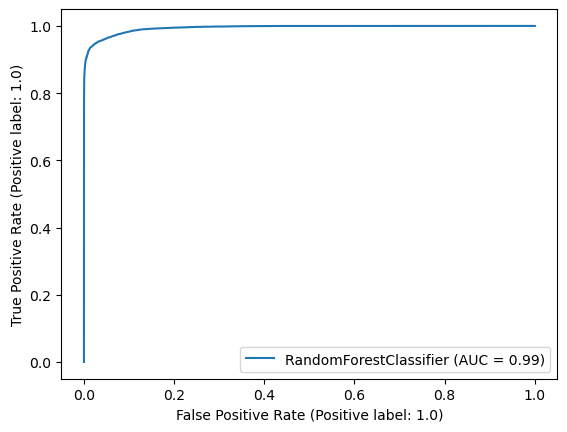

In [67]:
metrics.plot_roc_curve(model_rf, X_test, y_test)  
plt.show() 

In [68]:
roc_auc = roc_auc_score(y_test, y_pred_rf)
print("ROC_AUC = {}".format(roc_auc))

ROC_AUC = 0.9612495688981265


### Logistic Regression

In [69]:
#Initiating the classifier
model_lr = LogisticRegression()
#Passing the data to the classifier
model_lr.fit(X_train, y_train)

LogisticRegression()

In [70]:
y_pred_lr = model_lr.predict(X_test)

In [71]:
result_lr = accuracy_score(y_test, y_pred_lr)
print('Accuracy is: ', result_lr*100)

Accuracy is:  87.16507545426548


In [72]:
print(confusion_matrix(y_test, y_pred_lr))

[[13162  1411]
 [ 1923  9480]]


In [73]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89     14573
         1.0       0.87      0.83      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



C:\Users\Airin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


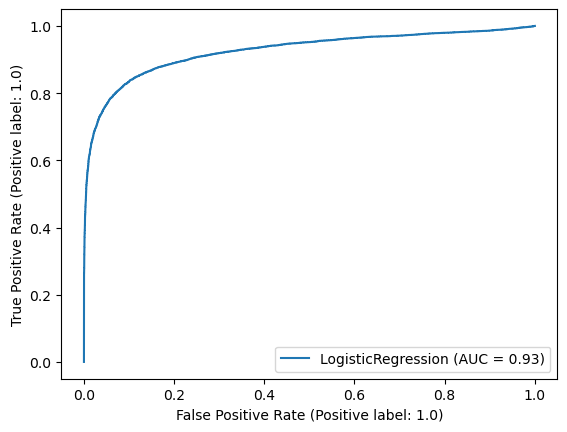

In [74]:
metrics.plot_roc_curve(model_lr, X_test, y_test)  
plt.show() 

### XGBoost

In [377]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [76]:
y_pred_xgb = model_xgb.predict(X_test)

In [77]:
predictions_xgb = [round(value) for value in y_pred_xgb]

In [78]:
# evaluate predictions
result_xgb = accuracy_score(y_test, y_pred_xgb)
print('Accuracy is: ', result_xgb*100)

Accuracy is:  96.33122882660918


[[14248   325]
 [  628 10775]]


C:\Users\Airin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


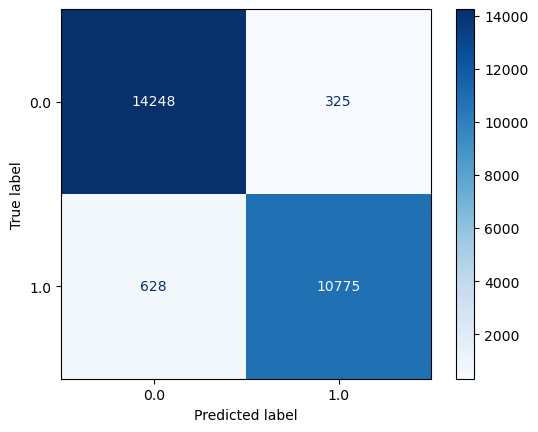

In [378]:
print(confusion_matrix(y_test, y_pred_xgb))


plot_confusion_matrix(model_xgb, X_test, y_test,cmap=plt.cm.Blues)

In [239]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     14573
         1.0       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



C:\Users\Airin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


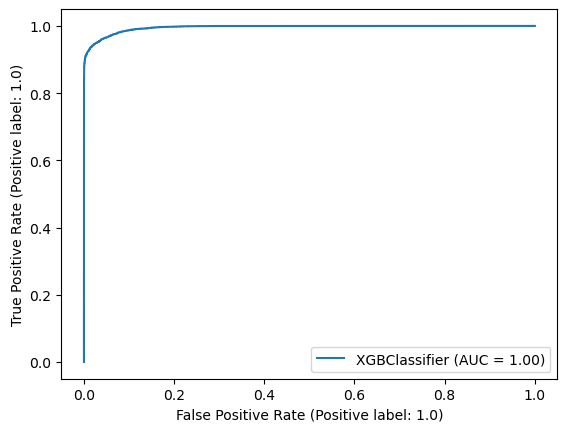

In [80]:
metrics.plot_roc_curve(model_xgb, X_test, y_test)  
plt.show() 

### ADA Boost

In [81]:
model_ada = AdaBoostClassifier()
model_ada.fit(X_train, y_train)

AdaBoostClassifier()

In [82]:
y_pred_ada = model_ada.predict(X_test)

In [83]:
# evaluate predictions
result_ada = accuracy_score(y_test, y_pred_ada)
print('Accuracy is: ', result_ada*100)

Accuracy is:  92.63165999384046


In [84]:
print(confusion_matrix(y_test, y_pred_ada))

[[13695   878]
 [ 1036 10367]]


C:\Users\Airin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


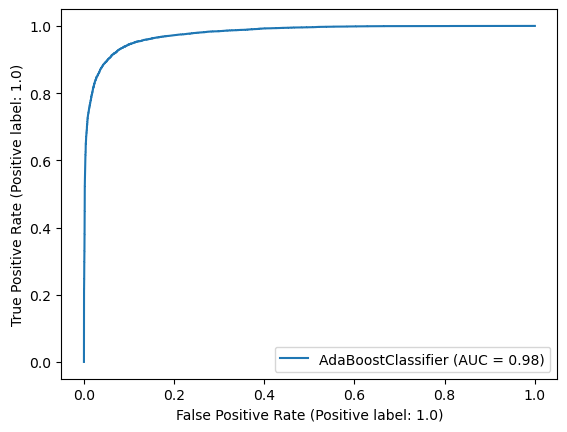

In [85]:
metrics.plot_roc_curve(model_ada, X_test, y_test)  
plt.show() 

# Lazy Predict

In [83]:
import lazypredict

In [84]:
from lazypredict.Supervised import LazyClassifier

In [85]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [27:22<00:00, 56.64s/it]   


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.96,0.96,0.96,0.96,6.67
LGBMClassifier,0.96,0.96,0.96,0.96,0.42
XGBClassifier,0.96,0.96,0.96,0.96,1.60
ExtraTreesClassifier,0.96,0.96,0.96,0.96,5.28
BaggingClassifier,0.96,0.96,0.96,0.96,2.67
SVC,0.95,0.95,0.95,0.95,119.10
DecisionTreeClassifier,0.95,0.95,0.95,0.95,0.48
AdaBoostClassifier,0.93,0.92,0.92,0.93,2.99
KNeighborsClassifier,0.93,0.92,0.92,0.93,35.47


# Model 1: Random Forest Classifier

# Dimensionality Reduction

### Feature Extraction

### PCA

In [136]:
pca = PCA(n_components = 5)
#pca = PCA(0.9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [137]:
explained_variance = pca.explained_variance_ratio_

In [138]:
explained_variance

array([0.1857519 , 0.1078739 , 0.10006412, 0.08934246, 0.08306349])

In [139]:
model_rf_pca = RandomForestClassifier(n_estimators=1000)
model_rf_pca.fit(X_train_pca, y_train)

RandomForestClassifier(n_estimators=1000)

In [140]:
y_pred_rf_pca = model_rf_pca.predict(X_test_pca)

In [141]:
result_rf_pca = accuracy_score(y_test, y_pred_rf_pca)
print("Accuracy is: ", result_rf_pca*100)

Accuracy is:  89.07838004311672


In [142]:
print(confusion_matrix(y_test, y_pred_rf_pca))

[[13451  1122]
 [ 1715  9688]]


In [143]:
print(classification_report(y_test, y_pred_rf_pca))

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90     14573
         1.0       0.90      0.85      0.87     11403

    accuracy                           0.89     25976
   macro avg       0.89      0.89      0.89     25976
weighted avg       0.89      0.89      0.89     25976



C:\Users\Airin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


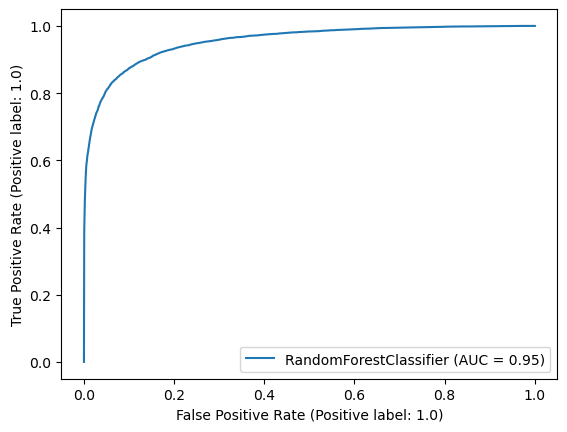

In [144]:
metrics.plot_roc_curve(model_rf_pca, X_test_pca, y_test)
plt.show()

### PCA 2

In [145]:
pca = PCA(0.95)
X_train_pca2 = pca.fit_transform(X_train)
X_test_pca2 = pca.transform(X_test)

In [146]:
explained_variance2 = pca.explained_variance_ratio_

In [147]:
explained_variance2

array([0.1857519 , 0.10787391, 0.10006413, 0.08934249, 0.08306352,
       0.06800005, 0.046353  , 0.04381641, 0.04244613, 0.03727583,
       0.03148228, 0.02361455, 0.02189585, 0.02083969, 0.01935549,
       0.01668881, 0.01460284])

In [148]:
model_rf_pca2 = RandomForestClassifier(n_estimators=1000)
model_rf_pca2.fit(X_train_pca2, y_train)

RandomForestClassifier(n_estimators=1000)

In [149]:
y_pred_rf_pca2 = model_rf_pca2.predict(X_test_pca2)

In [150]:
result_rf_pca2 = accuracy_score(y_test, y_pred_rf_pca2)
print("Accuracy is: ", result_rf_pca2*100)

Accuracy is:  93.28226054819834


In [151]:
print(confusion_matrix(y_test, y_pred_rf_pca2))

[[13961   612]
 [ 1133 10270]]


In [152]:
print(classification_report(y_test, y_pred_rf_pca2))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94     14573
         1.0       0.94      0.90      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



C:\Users\Airin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


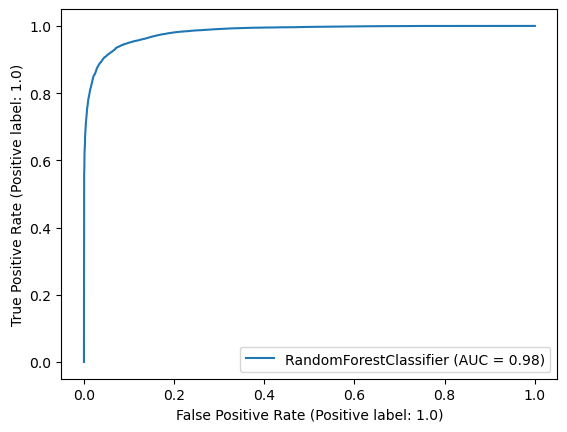

In [153]:
metrics.plot_roc_curve(model_rf_pca2, X_test_pca2, y_test)
plt.show()

### Hyper Parameter Optimization

### Grid Search

In [177]:
param_grid = {
    'n_estimators' : [int(x) for x in np.linspace(start = 800, stop = 1600, num = 3)],
    'max_features' : ['auto', 'sqrt'],
    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 3)],
    'min_samples_split' : [5, 10],
    'min_samples_leaf' : [2, 4],
    'bootstrap' : [True, False]
}

In [178]:
print(param_grid)

{'n_estimators': [800, 1200, 1600], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 60, 110], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4], 'bootstrap': [True, False]}


In [179]:
# Create a based model
rf_gd = RandomForestClassifier()

In [180]:
grid_search = GridSearchCV(estimator = rf_gd, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [181]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 144 candidates, totalling 288 fits


{'bootstrap': False, 'max_depth': 60, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 1600}

In [245]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy is:', accuracy*100, "%")
    return accuracy

In [246]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_train, y_train)

Model Performance
Accuracy is: 99.92300585155527 %


In [248]:
base_model = RandomForestClassifier(n_estimators = 1000)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Accuracy is: 96.34662765629812 %


In [249]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 3.71%.


In [187]:
best_grid

RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=1600)

C:\Users\Airin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


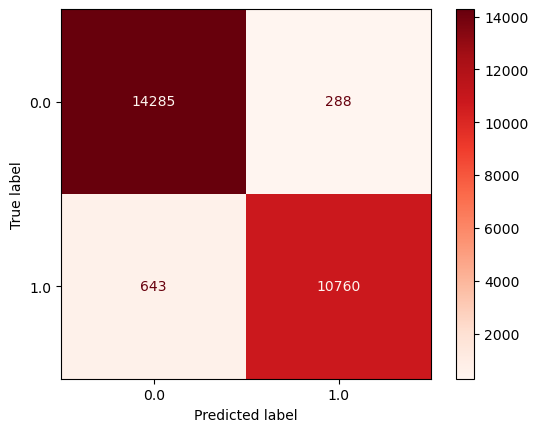

In [384]:
plot_confusion_matrix(best_grid, X_test, y_test,cmap=plt.cm.Reds)

C:\Users\Airin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


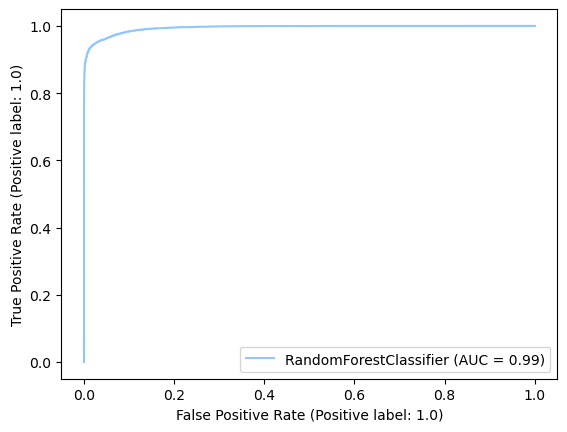

In [385]:
metrics.plot_roc_curve(best_grid, X_test, y_test)
plt.show()

# Model 2: XGB Classifier

# Dimensionality Reduction

### Feature Extraction

### PCA

In [188]:
model_xgb_pca = xgb.XGBClassifier()
model_xgb_pca.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [189]:
y_pred_xgb_pca = model_xgb_pca.predict(X_test_pca)

In [190]:
result_xgb_pca = accuracy_score(y_test, y_pred_xgb_pca)
print("Accuracy is: ", result_xgb_pca*100)

Accuracy is:  88.36233446258085


In [191]:
print(confusion_matrix(y_test, y_pred_xgb_pca))

[[13385  1188]
 [ 1835  9568]]


In [192]:
print(classification_report(y_test, y_pred_xgb_pca))

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90     14573
         1.0       0.89      0.84      0.86     11403

    accuracy                           0.88     25976
   macro avg       0.88      0.88      0.88     25976
weighted avg       0.88      0.88      0.88     25976



C:\Users\Airin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


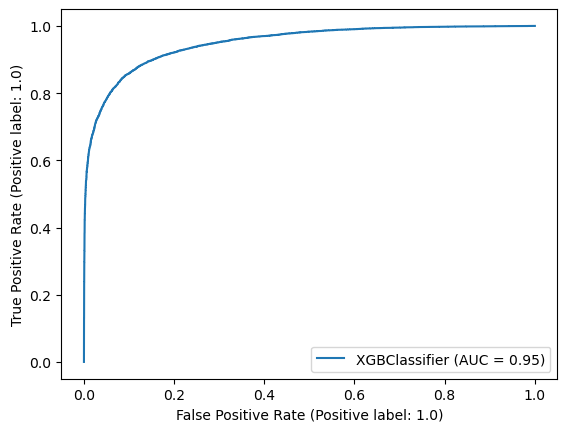

In [193]:
metrics.plot_roc_curve(model_xgb_pca, X_test_pca, y_test)
plt.show()

### PCA2

In [194]:
model_xgb_pca2 = xgb.XGBClassifier()
model_xgb_pca2.fit(X_train_pca2, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [195]:
y_pred_xgb_pca2 = model_xgb_pca2.predict(X_test_pca2)

In [196]:
result_xgb_pca2 = accuracy_score(y_test, y_pred_xgb_pca2)
print("Accuracy is: ", result_xgb_pca2*100)

Accuracy is:  93.8135201724669


In [197]:
print(confusion_matrix(y_test, y_pred_xgb_pca2))

[[13978   595]
 [ 1012 10391]]


In [198]:
print(classification_report(y_test, y_pred_xgb_pca2))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95     14573
         1.0       0.95      0.91      0.93     11403

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



C:\Users\Airin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


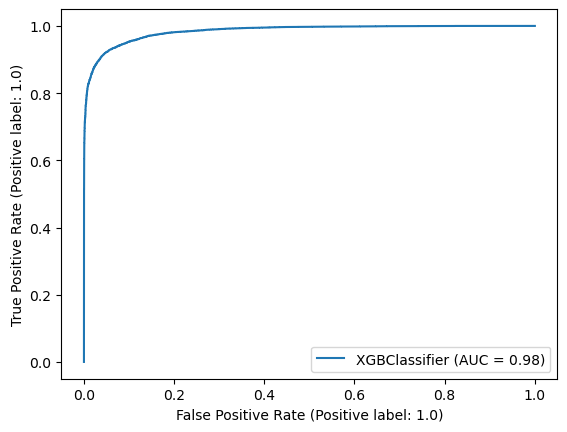

In [199]:
metrics.plot_roc_curve(model_xgb_pca2, X_test_pca2, y_test)
plt.show()

### Hyper Parameter Optimization

### Randomized Search CV

In [200]:
from sklearn.model_selection import RandomizedSearchCV

In [205]:
classifier_xgb = xgb.XGBClassifier()

In [206]:
params_rs_xgb = {
    'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight' : [ 1, 3, 5, 7 ],
    'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [207]:
rs_model = RandomizedSearchCV(classifier_xgb,param_distributions=params_rs_xgb,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [208]:
#model fitting
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                         

In [209]:
rs_model.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [250]:
base_model_xgb = xgb.XGBClassifier()
base_model_xgb.fit(X_train, y_train)
base_accuracy_xgb = evaluate(base_model_xgb, X_test, y_test)

Model Performance
Accuracy is: 96.33122882660918 %


In [251]:
best_random = rs_model.best_estimator_
print(best_random)
random_accuracy = evaluate(best_random, X_test, y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Model Performance
Accuracy is: 96.29658145980905 %


In [252]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy_xgb) / base_accuracy_xgb))

Improvement of -0.04%.


C:\Users\Airin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


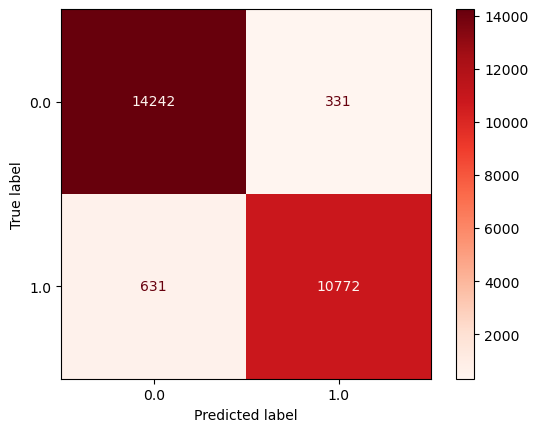

In [386]:
plot_confusion_matrix(best_random, X_test, y_test,cmap=plt.cm.Reds)

C:\Users\Airin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


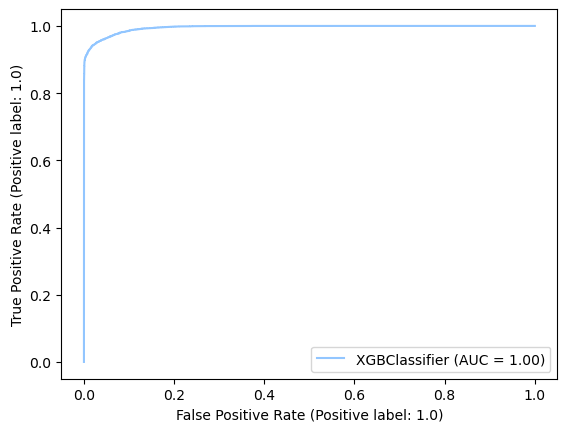

In [387]:
metrics.plot_roc_curve(best_random, X_test, y_test)
plt.show()